In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('~/Downloads/medical_examination.csv')

In [6]:
# Add 'overweight' column and cast true/false values to 1/0

df['overweight'] = (df['weight'] / ( df['height'] / 100 ) ** 2 > 25).astype(int)

In [7]:
# Normalise data by making 0 always good and 1 always bad

df['gluc'] = (df['gluc'] > 1).astype(int)

df['cholesterol'] = (df['cholesterol'] > 1).astype(int)

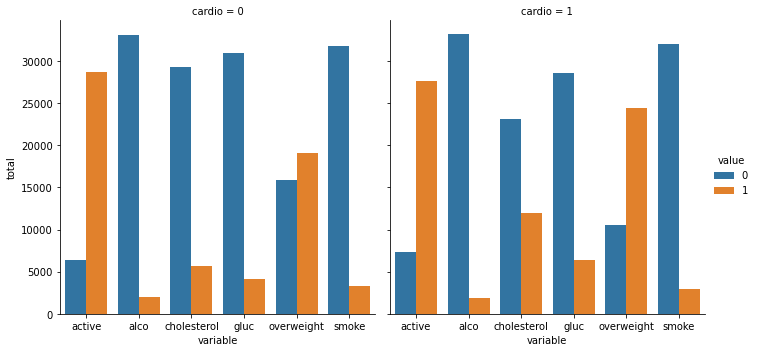

In [8]:
# Draw cat plot to show correlation between health variables in different cardio groups

df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
    
cardio_catplot = sns.catplot(x='variable', kind='count', hue='value', col='cardio', data=df_cat)
cardio_catplot.set_axis_labels('variable', 'total')
cardio_catplot.set_titles('cardio = {col_name}')

In [9]:
# Clean data 

df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
              (df['height'] >= df['height'].quantile(0.025)) & 
              (df['height'] <= df['height'].quantile(0.975)) & 
              (df['weight'] >= df['weight'].quantile(0.025)) & 
              (df['weight'] <= df['weight'].quantile(0.975))]

In [11]:
# Correlation matrix between different variables

corr = df_heat.corr()

corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [14]:
# Generate a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool))

<AxesSubplot:>

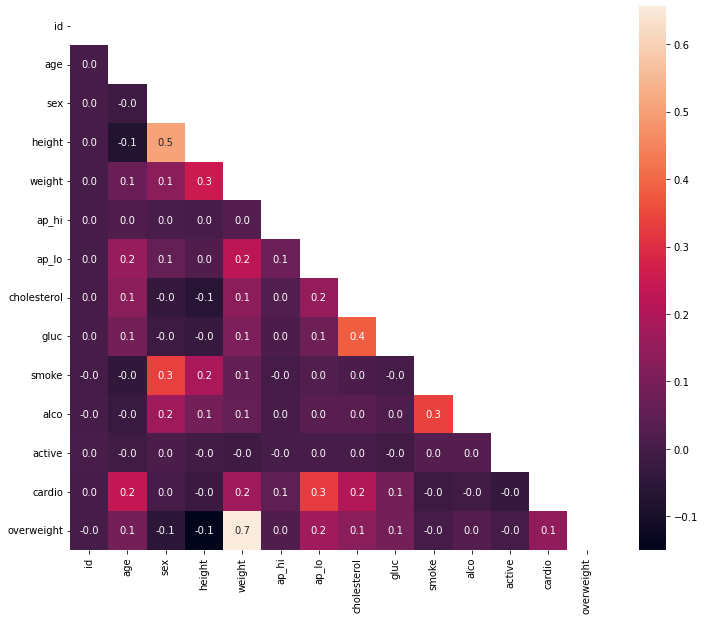

In [15]:
# Draw heatmap to show correlation

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask, fmt=".1f", annot=True, cbar=True)